In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Test bioreactor generations

#### Load experiemental data

In [2]:
# Parameters
TOTAL_TIME = 60
N_STEPS = 1000

# Load experimental data for plotting
growth = pd.read_csv('experimental_data/biomass_wt.csv')
glc = pd.read_csv('experimental_data/glc_wt.csv')
anth = pd.read_csv('experimental_data/anth_wt.csv')
glc[glc.columns[1]] -= 0.54
glc[glc.columns[2]] -= 0.54
glc[glc.columns[3]] -= 0.54
dict_scaling = {'biomass_strain_1': 0.28e-12/0.05, 'anth_e': 136.13 * 1e-9, 'glc_D_e': 1e-9 * 180.156}
labels = {'biomass_strain_1': 'biomass (g)', 'anth_e': 'anthranilate (g/L)', 'glc_D_e': 'glucose (g/L)'}
exp_data = {'biomass_strain_1': growth, 'anth_e': anth, 'glc_D_e': glc}
T = np.linspace(0, TOTAL_TIME, N_STEPS)

#### Load and plot simulated data

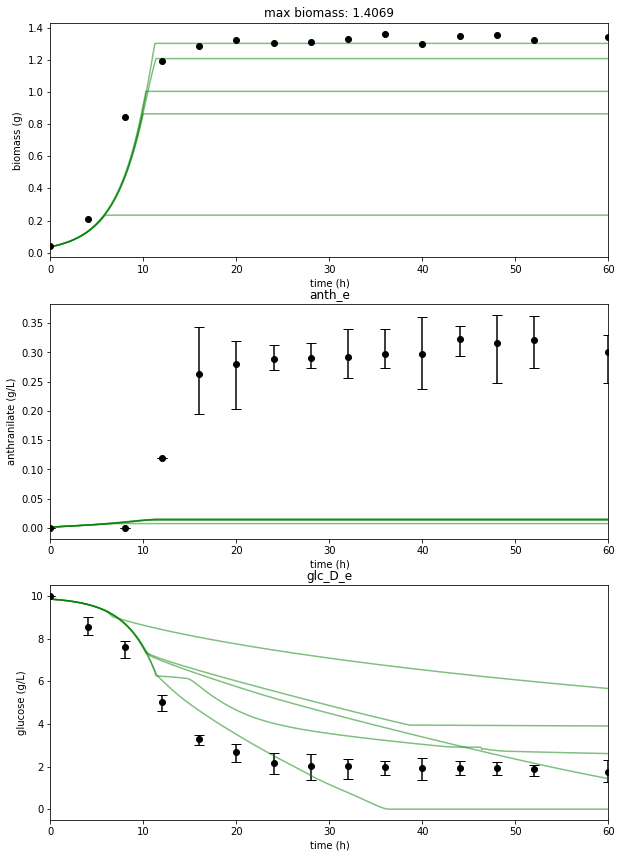

In [4]:
path = f'output/bioreactor/ode_sols_wt_10_23.csv'  ## path to the solution file
n_simulations = 10
all_sols = pd.read_csv(path)

plt.figure(figsize = (10,25))
plt.title('Generation', fontsize = 50)
ix=1
final_biomass = []
final_anth = []
final_glc = []

for conc, scaling in dict_scaling.items():
    
    plt.subplot(5,1,ix)

    # Plot simulated data

    for sol_id in range(n_simulations):
        this_sol = all_sols[all_sols['solution_id']==sol_id]
        if len(this_sol[conc])==N_STEPS:
            plt.plot(T, this_sol[conc]*scaling, color = 'green', alpha = 0.5)
        if conc== 'biomass_strain_1': final_biomass.append(list(this_sol[conc]*scaling)[-1])
        if conc== 'anth_e':  final_anth.append(list(this_sol[conc]*scaling)[-1])
        if conc== 'glc_D_e':  final_glc.append(list(this_sol[conc]*scaling)[-1])
        
    # Plot experimental data (when available)
    
    exp_ = exp_data[conc]
    mean = exp_[exp_.columns[1]]
    time_exp = exp_[exp_.columns[0]]

    if len(exp_.columns) > 2:
        lo = exp_[exp_.columns[2]]
        hi = exp_[exp_.columns[3]]
        plt.errorbar(time_exp, mean, yerr=np.asarray([mean - lo, hi - mean]),
                     fmt='ko', label= f'{conc}', capsize=5)
    else:
        plt.plot(time_exp, mean, 'ko', label=f'{conc}')  

    if conc== 'biomass_strain_1': plt.title(f'max biomass: {np.round(np.max(final_biomass),4)}')
    
    else: plt.title(f'{conc}')

    
    plt.xlabel('time (h)')
    plt.ylabel(labels[conc])
    plt.xlim([0, 60])
    ix+=1
  

#plt.savefig(f'{plot_output}/bioreactor_results.jpg',dpi = 300, bbox_inches = 'tight')
plt.show()
plt.close()




In [11]:
this_sol

,Unnamed: 0,biomass_strain_1,acald_e,ac_e,akg_e,anth_e,co2_e,lac_D_e,etoh_e,for_e,...,strain_1__3dhsk_c,strain_1_skm5p_c,strain_1_succ_p,strain_1_r5p_c,strain_1_trp_L_p,strain_1__34hpp_c,strain_1_tyr_L_p,strain_1_pphn_c,time,solution_id
3510,0,6.607143e+09,9.936514,1.000000e+01,0.191176,10566.458886,100.116513,1.000000e+01,1917.915556,1.754362e+06,...,4.363838e+05,3.776610e+04,4064.492772,7.803086e+05,15419.867896,5.000000e+05,103.831589,101.132465,0.000000,9
3511,1,6.731535e+09,10.521500,6.750407e+02,1.387608,10939.657531,100.116513,1.141277e+01,1919.041673,1.754363e+06,...,4.344756e+05,3.810381e+04,4074.264773,7.792910e+05,15412.735525,5.009773e+05,103.995396,101.617521,0.060060,9
3512,2,6.858520e+09,10.785036,1.353936e+03,2.607240,11316.302736,100.116513,1.285565e+01,1920.190902,1.754363e+06,...,4.198118e+05,3.800606e+04,4084.102814,7.777218e+05,15405.457075,5.012277e+05,103.967675,101.779995,0.120120,9
3513,3,6.988071e+09,10.911907,2.046559e+03,3.850724,11694.583889,100.116513,1.432324e+01,1921.363225,1.754363e+06,...,4.048635e+05,3.778513e+04,4088.570810,7.771204e+05,15398.043651,5.004725e+05,103.797070,101.804175,0.180180,9
3514,4,7.120195e+09,10.989396,2.752930e+03,5.118332,12075.266196,100.116513,1.581419e+01,1922.558685,1.754363e+06,...,3.941644e+05,3.768631e+04,4092.529427,7.768579e+05,15390.483776,4.999509e+05,103.526007,101.916538,0.240240,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3827,317,2.759091e+11,1417.776529,1.439891e+06,54594.696567,304434.869430,100.116513,3.995967e+06,5959.708694,8.034792e+05,...,9.480735e+08,1.653785e+04,462410.007387,6.121223e+06,64.580803,2.124803e+08,15755.641425,21244.868561,19.039039,9
3828,318,2.759091e+11,1763.054959,1.439892e+06,55178.464302,304435.231145,100.116513,4.046191e+06,6221.875997,8.229462e+05,...,9.429221e+08,3.377148e+04,490973.895482,6.597595e+06,64.580844,2.126145e+08,17499.572891,22412.278231,19.099099,9
3829,319,2.759091e+11,2365.865558,1.439892e+06,55808.065168,304435.484727,100.116513,4.089843e+06,6551.459613,8.390036e+05,...,9.375629e+08,9.183624e+04,507237.871402,6.998007e+06,64.580870,2.130520e+08,19134.254875,23511.302188,19.159159,9
3830,320,2.759091e+11,3284.164338,1.439888e+06,56503.929765,304435.604405,100.116513,4.119262e+06,6963.761381,8.513309e+05,...,9.319810e+08,6.691869e+05,502166.088005,6.347972e+06,64.580486,2.139038e+08,20548.499081,24585.955129,19.219219,9


In [4]:
# =============== PRUNING FOR GOOD FITS =======================

# ## Prune first for anth
# less_ix = np.where(np.array(final_anth) >= 0.25)[0]
# more_ix = np.where(np.array(final_anth) <= 0.35)[0]

# good_anth_ix = np.intersect1d(less_ix, more_ix)

# ## Prune for growth
# less_ix_bm = np.where(np.array(final_biomass) >= 1.25)[0]
# more_ix_bm = np.where(np.array(final_biomass) <= 1.35)[0]

# good_biomass_ix = np.intersect1d(less_ix_bm, more_ix_bm)

# good_ix_unfiltered = np.intersect1d(good_anth_ix, good_biomass_ix)

# ## now prune for lag in dynamics (its a bit repetitive but no time lol)

# # First anthranilate

# good_ix_anth = []
# dict_scaling_prune_anth = {'anth_e': 136.13 * 1e-9}
# time_stamp = 16    ## experimental time point where lag is being detected
# time_to_detect_lag = np.where(T>=time_stamp)[0][1] ## corresponding time point where lag will be detected in simulated data

# exp_anth_range = [anth[anth['Time']==time_stamp]['low'].values[0], 
#                   anth[anth['Time']==time_stamp]['high'].values[0]]


# for conc, scaling in dict_scaling_prune_anth.items():
    
#     # Load simulated filtered simulated data
#     for sol_id in good_ix_unfiltered:
        
#         this_sol = all_sols[all_sols['solution_id']==sol_id]
#         simulated_yield_at_time_stamp = list(this_sol[conc]*scaling)[time_to_detect_lag]
#         if exp_anth_range[0] <= simulated_yield_at_time_stamp <= exp_anth_range[1]:
#             good_ix_anth.append(sol_id)
            

# # Now growth
# time_stamp = 16   ## experimental time point where lag is being detected
# time_to_detect_lag = np.where(T>=time_stamp)[0][1] ## corresponding time point where lag will be detected in simulated data

# good_ix = []
# growth_at_time_stamp = growth[growth['Time']==time_stamp]['mean'].values[0]
# tol = 5  # % error allowed in growth at the time stamp
# exp_bm_range = [(1-tol/100)*growth_at_time_stamp, 
#                 (1+tol/100)*growth_at_time_stamp]

# dict_scaling_prune_bm = {'biomass_strain_1': 0.28e-12/0.05} 

# for conc, scaling in dict_scaling_prune_bm.items():
    
#     # Load simulated filtered simulated data
#     for sol_id in good_ix_anth:
        
#         this_sol = all_sols[all_sols['solution_id']==sol_id]
#         simulated_yield_at_time_stamp = list(this_sol[conc]*scaling)[time_to_detect_lag]
#         if exp_bm_range[0] <= simulated_yield_at_time_stamp <= exp_bm_range[1]:
#             good_ix.append(sol_id)

            

In [5]:
good_ix_2 = np.where(np.array(final_glc)> 1.5)[0]

good_ix = np.intersect1d(good_ix, good_ix_2)

NameError: name 'good_ix' is not defined

In [ ]:
good_ix

array([ 2, 21, 26, 29, 51, 59, 75, 89])

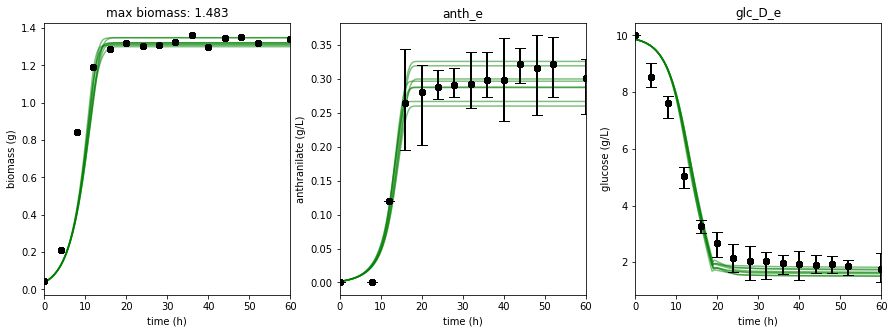

In [ ]:
plt.figure(figsize = (15,5))
good_ix = good_ix

for this_ix in good_ix:
    
    ix=1    
    for conc, scaling in dict_scaling.items():

        plt.subplot(1,3,ix)

        # Plot simulated data

        for sol_id in [this_ix]:
            this_sol = all_sols[all_sols['solution_id']==sol_id]
            if len(this_sol[conc])==N_STEPS:
                plt.plot(T, this_sol[conc]*scaling, color = 'green', alpha = 0.5)
        # Plot experimental data (when available)

        if conc=='biomass_strain_1' or conc == 'anth_e' or conc=='glc_D_e':

            #load experimental data
            exp_ = exp_data[conc]
            mean = exp_[exp_.columns[1]]
            time_exp = exp_[exp_.columns[0]]

            if len(exp_.columns) > 2:
                lo = exp_[exp_.columns[2]]
                hi = exp_[exp_.columns[3]]
                plt.errorbar(time_exp, mean, yerr=np.asarray([mean - lo, hi - mean]),
                             fmt='ko', label= f'{conc}', capsize=5)
            else:
                plt.plot(time_exp, mean, 'ko', label=f'{conc}')  

        if conc== 'biomass_strain_1': plt.title(f'max biomass: {np.round(np.max(final_biomass),4)}')
        else: plt.title(f'{conc}')
        plt.xlabel('time (h)')
        plt.ylabel(labels[conc])
        
        plt.xlim([0, 60])
        ix+=1

    #plot_output = f'shikki_bioreactor/plots/'
    #os.makedirs(plot_output, exist_ok = True)
    #plt.savefig(f'shikki_bioreactor/new_sample/final_plot_perturb_4.jpg',dpi = 300, bbox_inches = 'tight')
plt.show()
plt.close()

In [ ]:
for (ix, this_ix, this_glc) in zip(np.arange(len(good_ix)), good_ix, np.array(final_glc)[good_ix]):
    print(f'{ix}::: {this_ix} : final glucose {this_glc}')

0::: 84 : final glucose 5.270184525511997e-06
1::: 282 : final glucose 8.71216169794411e-10
2::: 427 : final glucose 2.0763007784241932e-06
3::: 442 : final glucose 2.8342615598768973e-06
4::: 590 : final glucose 2.0324918853276185e-06
5::: 1831 : final glucose 0.005701810739310521
6::: 1964 : final glucose 1.559192244833596e-05
7::: 2285 : final glucose 2.6009396035163948e-11
8::: 2421 : final glucose 0.0599984410542869
9::: 2634 : final glucose 3.004240594048428e-09
10::: 2676 : final glucose 1.0988135024020685e-07
11::: 2806 : final glucose 6.0636585899117756e-05
12::: 2992 : final glucose 1.3123780268359363e-10
13::: 3026 : final glucose 8.200782324029966e-10
14::: 3033 : final glucose 0.0006038361577676511
15::: 3215 : final glucose 3.7079603217458374e-10
16::: 3780 : final glucose 3.177334571803826e-10
17::: 3896 : final glucose 0.03192617154265678
18::: 3992 : final glucose 0.07053134498254408
19::: 3994 : final glucose 2.558265641124127e-09
20::: 4097 : final glucose 0.28713198

## Final plot - All solutions

In [ ]:
## Load one sample and get the percentile lines for reference
ref_sol = pd.read_csv('shikki_bioreactor/one_more_sample/solutions.csv')
ref_sol_list = [[],[],[]]

cnt = 0
for conc, scaling in dict_scaling.items():    
    for sol_id in range(10000):
        this_sol = all_sols[all_sols['solution_id']==sol_id]
        if len(this_sol[conc])==N_STEPS:
                ref_sol_list[cnt].append(this_sol[conc].values*scaling)
    cnt+=1

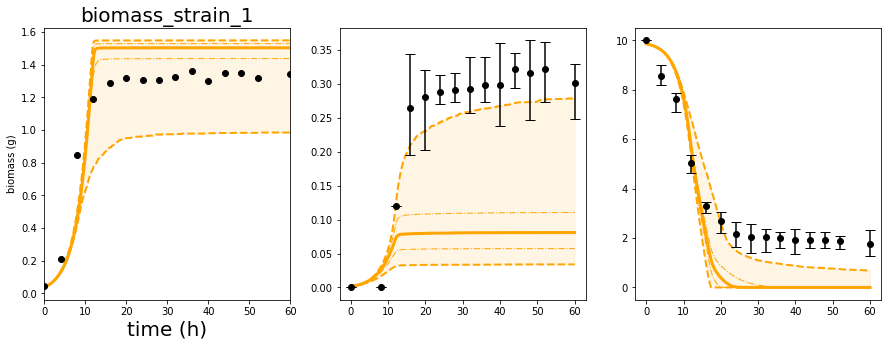

In [ ]:
plt.figure(figsize = (15,5))

ix =1
for this_lol in ref_sol_list:
    plt.subplot(1,3,ix)
    
    
    pctile_5  = np.percentile(this_lol, 5, axis = 0)
    pctile_25  = np.percentile(this_lol, 25, axis = 0)
    pctile_75  = np.percentile(this_lol, 75, axis = 0)
    pctile_95  = np.percentile(this_lol, 95, axis = 0)
    
    plt.plot(T, np.median(this_lol, axis = 0), lw = 3, color = 'orange')
    plt.plot(T, pctile_5, color = 'orange', lw = 2, ls = '--')
    plt.plot(T, pctile_25,  color = 'orange',lw = 1, ls = '-.')
    plt.plot(T, pctile_75,  color = 'orange',lw =1, ls = '-.')
    plt.plot(T, pctile_95, color = 'orange',lw = 2, ls = '--')
    plt.fill_between(x = T, y2 = pctile_5,y1 =  pctile_95, color = 'orange', alpha = 0.1)
    
    ix+=1

# plot experimental data
ix = 1
for conc, scaling in dict_scaling.items():
    
    plt.subplot(1,3, ix)
    exp_ = exp_data[conc]
    mean = exp_[exp_.columns[1]]
    time_exp = exp_[exp_.columns[0]]

    if len(exp_.columns) > 2:
        lo = exp_[exp_.columns[2]]
        hi = exp_[exp_.columns[3]]
        plt.errorbar(time_exp, mean, yerr=np.asarray([mean - lo, hi - mean]),
                     fmt='ko', label= f'{conc}', capsize=5)
    else:
        plt.plot(time_exp, mean, 'ko', label=f'{conc}')  


        plt.title(f'{conc}',  fontsize = 20)
        plt.xlabel('time (h)',  fontsize = 20)
        plt.ylabel(labels[conc])
        plt.xlim([0, 60])
    ix+=1
    
plt.savefig(f'shikki_bioreactor/whole_cloud.svg',dpi = 300, bbox_inches = 'tight')

## Final plot -> good fits

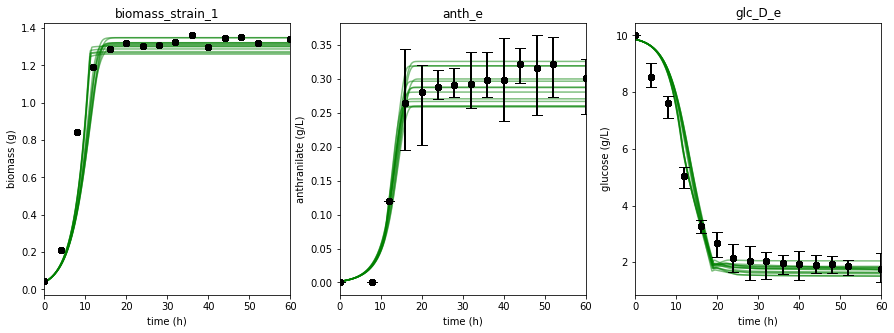

In [ ]:
paths =  ['shikki_bioreactor/new_sample/perturbation/point _1/perturbation_3/solutions_0.5.csv',
          'shikki_bioreactor/new_sample/perturbation/point_2/perturbation_2/solutions_0.5.csv']

ixs = [[55, 58, 82, 86, 96],
       [2, 21, 26, 29, 51, 59, 75, 89]]

plt.figure(figsize = (15,5))
for this_ixs, this_path in zip(ixs, paths):
    
    this_solsol = pd.read_csv(this_path)
    good_ix = this_ixs

    for this_ix in good_ix:
        ix=1    
        for conc, scaling in dict_scaling.items():

            plt.subplot(1,3,ix)

            # Plot simulated data

            for sol_id in [this_ix]:
                this_sol = this_solsol[this_solsol['solution_id']==sol_id]
                if len(this_sol[conc])==N_STEPS:
                    plt.plot(T, this_sol[conc]*scaling, color = 'green', alpha = 0.5)
            # Plot experimental data (when available)

            if conc=='biomass_strain_1' or conc == 'anth_e' or conc=='glc_D_e':

                #load experimental data
                exp_ = exp_data[conc]
                mean = exp_[exp_.columns[1]]
                time_exp = exp_[exp_.columns[0]]

                if len(exp_.columns) > 2:
                    lo = exp_[exp_.columns[2]]
                    hi = exp_[exp_.columns[3]]
                    plt.errorbar(time_exp, mean, yerr=np.asarray([mean - lo, hi - mean]),
                                 fmt='ko', label= f'{conc}', capsize=5)
                else:
                    plt.plot(time_exp, mean, 'ko', label=f'{conc}')  

            plt.title(f'{conc}')
            plt.xlabel('time (h)')
            plt.ylabel(labels[conc])

            plt.xlim([0, 60])
            ix+=1
plt.savefig(f'shikki_bioreactor/good_fit.svg',dpi = 300, bbox_inches = 'tight')
plt.show()